# InceptionV3 assignment

## Create dataset
Run the following code to create the dataset

In [3]:
import pathlib
import tensorflow as tf

data_dir = pathlib.Path("dataset")

image_count = len(list(data_dir.glob("*/*")))
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(299, 299),
    label_mode="categorical"
)

print("labels: ", train_ds.class_names)


Found 15 files belonging to 3 classes.
labels:  ['apple', 'banana', 'orange']


Images contained in the dataset

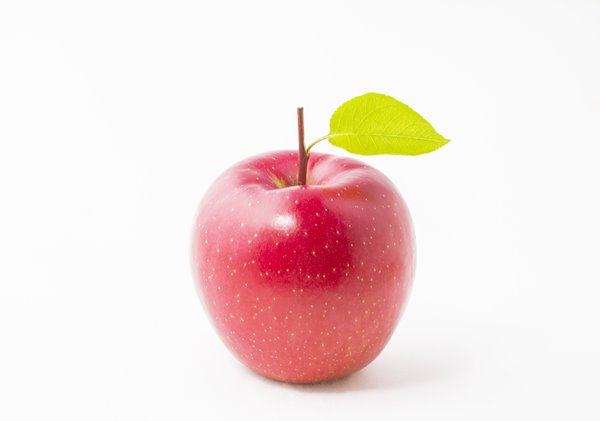

In [4]:
import PIL

apple = list(data_dir.glob("apple/*"))
PIL.Image.open(str(apple[0]))

## Model definition
You can also modify the code if necessary

In [ ]:
class InceptionV3:

    def __init__(self, input_shape, classes, batch_size):
        self.input_shape = input_shape
        self.classes = classes
        self.batch_size = batch_size

    def model(self):

        ############################################
        #              YOUR CODE HERE              #
        ############################################

        pass

        ############################################
        #            YOUR CODE ENDS HERE           #
        ############################################


    def fit(self):
        model = self.model()
        model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
        model.fit(train_ds, epochs=20, verbose=1)

        model.save("inceptionv3.h5")

## Training the model

In [ ]:
inception = InceptionV3(input_shape=(299, 299, 3), classes=3, batch_size=15)
inception.fit()

## Model Evaluation

Model evaluation differs by code.
Modify the following code so that it fits your model

apple


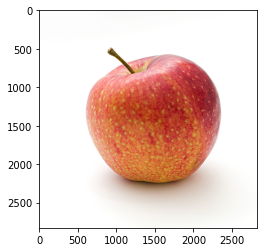

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt

test_image = tf.keras.preprocessing.image.load_img("dataset/apple_test.jpg")
test_image_arr = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_arr = tf.image.resize(test_image_arr, (299, 299))
test_image_arr = tf.expand_dims(test_image_arr, axis=0)

model = tf.keras.models.load_model("inceptionv3.h5")

print(train_ds.class_names[tf.math.argmax(model.predict(test_image_arr)[0][0])])

plt.imshow(test_image)
plt.show()